# Proyecto 1 - Marco Antonio Rimola De Leon - IDE09111187
Econometria 2
Trimestre 2 - 2023

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



In [4]:
# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# OverallQual: Overall material and finish quality, rates the overall material and finish of the house
#       10	Very Excellent
#       9	Excellent
#       8	Very Good
#       7	Good
#       6	Above Average
#       5	Average
#       4	Below Average
#       3	Fair
#       2	Poor
#       1	Very Poor
#         
#1stFlrSF: First Floor square feet
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#YearBuilt: Original construction date
#LotFrontage: Linear feet of street connected to property

data_proyecto = np.load('proyecto_training_data.npy')

In [5]:
nombres_columnas = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(data_proyecto, columns=nombres_columnas)

In [6]:
df

SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]

In [7]:
df.shape

(1460, 6)

### Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validacion y pruebas(20%).

In [8]:
filas_totales = df.shape[0]
slicing = int(0.8 * filas_totales)
data_entrenamiento, data_prueba = np.split(df, [slicing])
print("Data de Entrenamiento:", data_entrenamiento.shape)
print("Data de Prueba:", data_prueba.shape)

Data de Entrenamiento: (1168, 6)
Data de Prueba: (292, 6)


### Analisis exploratorio de datos

In [9]:
media = data_entrenamiento.mean()
valores_max = data_entrenamiento.max()
valores_min = data_entrenamiento.min()
rangos = data_entrenamiento.max() - data_entrenamiento.min()
std_dev = data_entrenamiento.std()
for column in data_entrenamiento.columns:
    print("Column:", column)
    print("Media:", media[column])
    print("Max:", valores_max[column])
    print("Min:", valores_min[column])
    print("Rangos:", rangos[column])
    print("Desviacion Estandar:", std_dev[column])
    print()


Column: SalePrice
Media: 180590.27739726027
Max: 755000.0
Min: 34900.0
Rangos: 720100.0
Desviacion Estandar: 78815.69790179149

Column: OverallQual
Media: 6.101027397260274
Max: 10.0
Min: 1.0
Rangos: 9.0
Desviacion Estandar: 1.3780252276191631

Column: 1stFlrSF
Media: 1156.3236301369864
Max: 3228.0
Min: 334.0
Rangos: 2894.0
Desviacion Estandar: 373.7803744886528

Column: TotRmsAbvGrd
Media: 6.4854452054794525
Max: 14.0
Min: 2.0
Rangos: 12.0
Desviacion Estandar: 1.6091407087243883

Column: YearBuilt
Media: 1971.451198630137
Max: 2010.0
Min: 1875.0
Rangos: 135.0
Desviacion Estandar: 29.95170660645528

Column: LotFrontage
Media: 69.94698544698545
Max: 313.0
Min: 21.0
Rangos: 292.0
Desviacion Estandar: 23.478160779049645



### Para cada variable en el dataset usar seaborn para graficar un histograma de la variable

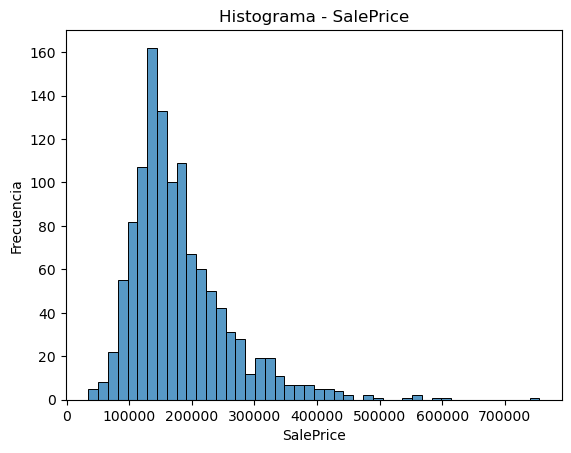

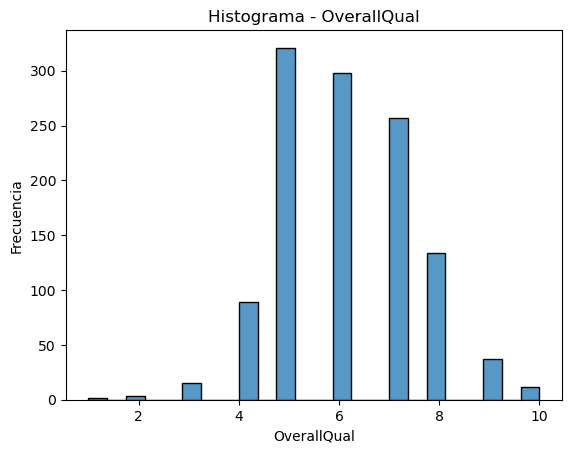

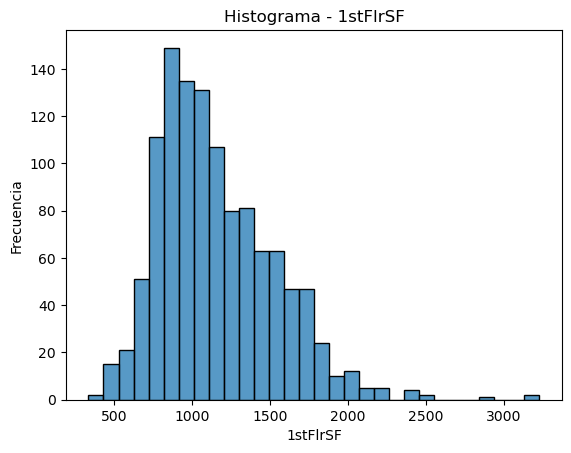

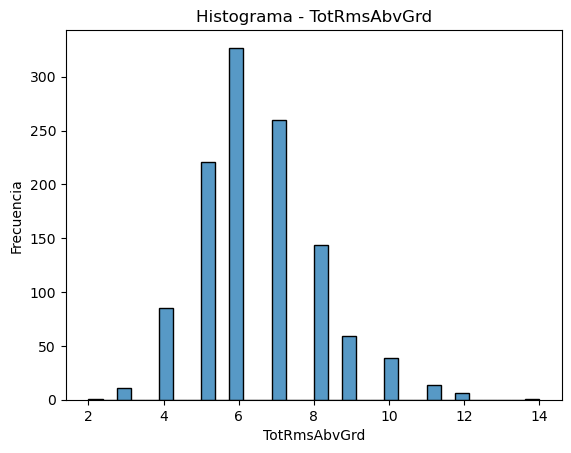

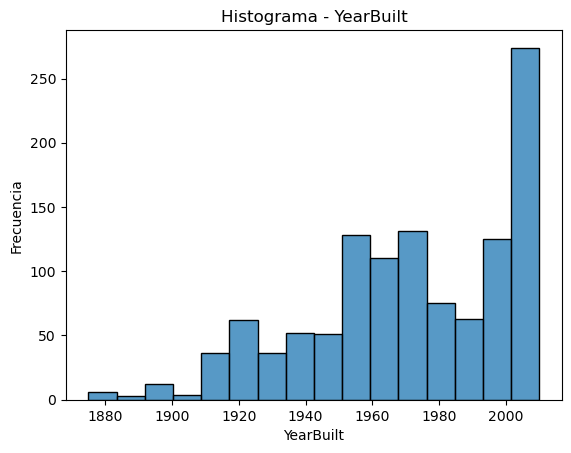

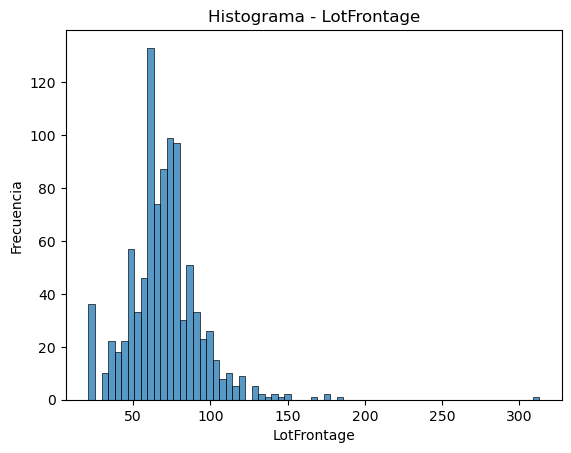

In [10]:
for column in data_entrenamiento.columns:
    sns.histplot(data=data_entrenamiento[column])
    plt.title(f"Histograma - {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

In [11]:
coeficiente_correl = data_entrenamiento.corr()['SalePrice']
print(coeficiente_correl)

SalePrice       1.000000
OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64


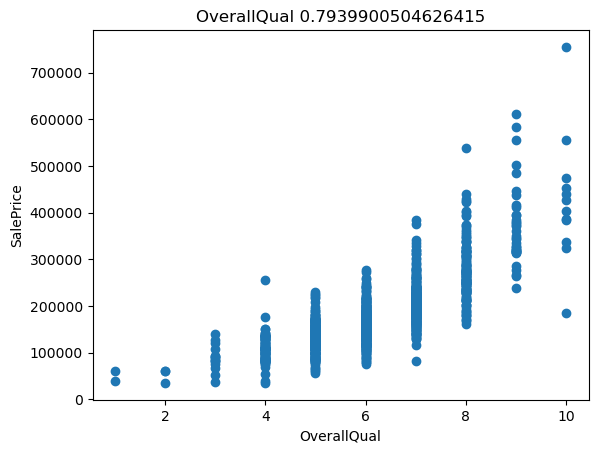

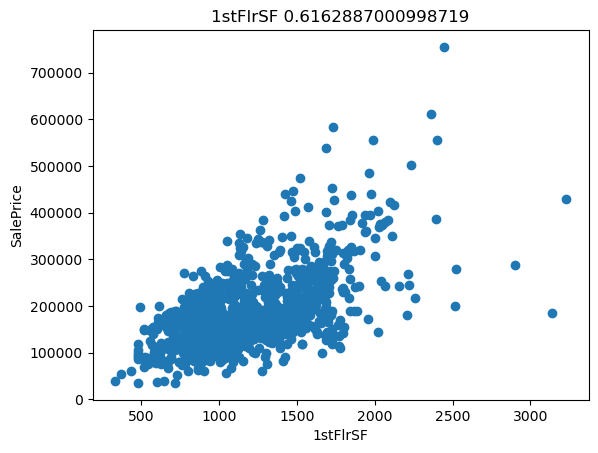

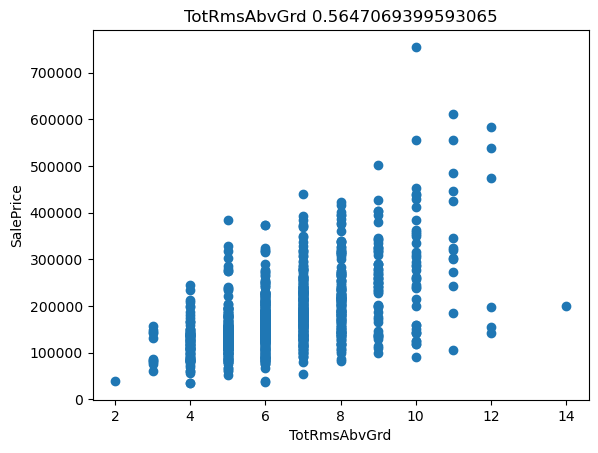

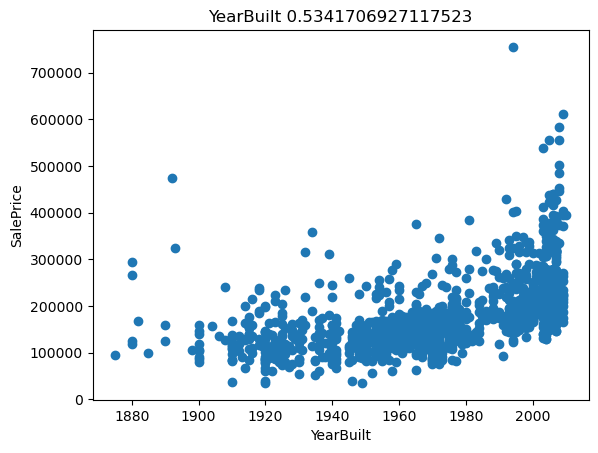

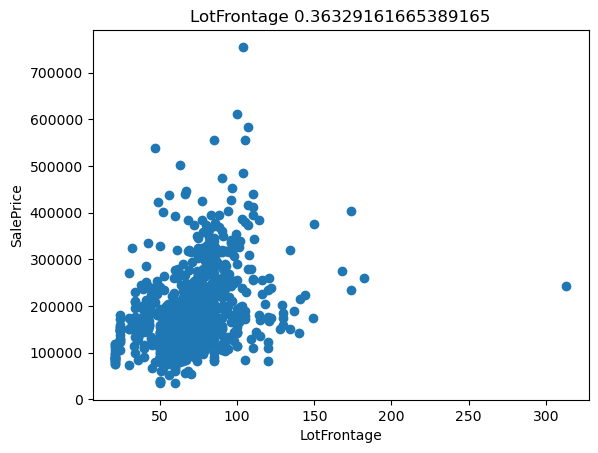

In [13]:
for column in data_entrenamiento.columns:
    if column != 'SalePrice':
        plt.scatter(data_entrenamiento[column], data_entrenamiento['SalePrice'])
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.title(f'{column} {coeficiente_correl[column]}')
        plt.show()

Los dos variables con mas potencia predictivo son OverallQual y 1stFlrSF

In [67]:
def train_linear_regression(x, y, epochs, imprimir_error_cada, alpha):
    
    X = np.column_stack((x, np.ones(len(x))))
    beta = np.zeros(2)
    error_list = []
    models = {}

      
    for epoch in range(epochs):
        y_pred = np.dot(X, beta)
        error = (1 / (2 * len(x))) * np.sum((y - y_pred) ** 2)
        gradient = (1 / len(x)) * np.dot(X.T, y_pred - y)
        beta -= alpha * gradient

    
        error_list.append(error)
        models[epoch] = beta.copy()


        if (epoch + 1) % imprimir_error_cada == 0 or epoch == epochs - 1:
            print("Iteración:", epoch + 1, "| Error:", error)
    
    beta0, beta1 = beta[1], beta[0]
    
    return models, error_list

Iteración: 10 | Error: 1394454395.5238411
Iteración: 20 | Error: 1390347591.754983
Iteración: 30 | Error: 1388052701.2844467
Iteración: 40 | Error: 1385779508.024703
Iteración: 50 | Error: 1383527744.1567154
Iteración: 60 | Error: 1381297207.6633806
Iteración: 70 | Error: 1379087698.434269
Iteración: 80 | Error: 1376899018.2453914
Iteración: 90 | Error: 1374730970.7414174
Iteración: 100 | Error: 1372583361.418056


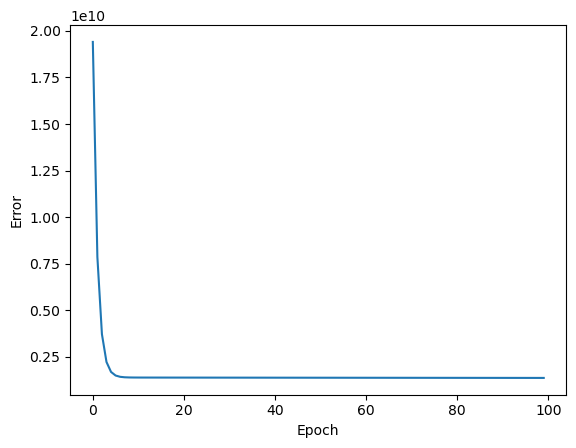

In [88]:
x_Overall_Qual = data_entrenamiento['OverallQual']
y = data_entrenamiento['SalePrice']

epochs = 100
imprimir_error_cada = 10
alpha = 0.01

models, error_list = train_linear_regression(x_Overall_Qual, y, epochs, imprimir_error_cada, alpha)

plt.plot(error_list)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


Iteración: 10 | Error: 15312212999.924818
Iteración: 20 | Error: 11878030861.591663
Iteración: 30 | Error: 9327654251.802912
Iteración: 40 | Error: 7433630990.968671
Iteración: 50 | Error: 6027044960.124736
Iteración: 60 | Error: 4982451526.041487
Iteración: 70 | Error: 4206689916.954777
Iteración: 80 | Error: 3630574794.502554
Iteración: 90 | Error: 3202726044.999331
Iteración: 100 | Error: 2884986507.6241245
Iteración: 110 | Error: 2649018975.284907
Iteración: 120 | Error: 2473778975.895717
Iteración: 130 | Error: 2343637947.194275
Iteración: 140 | Error: 2246989422.7703953
Iteración: 150 | Error: 2175213923.7321544
Iteración: 160 | Error: 2121910241.1549163
Iteración: 170 | Error: 2082324552.190392
Iteración: 180 | Error: 2052926456.262844
Iteración: 190 | Error: 2031094120.6656473
Iteración: 200 | Error: 2014880455.6581118
Iteración: 210 | Error: 2002839465.6781585
Iteración: 220 | Error: 1993897290.0187762
Iteración: 230 | Error: 1987256431.8906884
Iteración: 240 | Error: 19823246

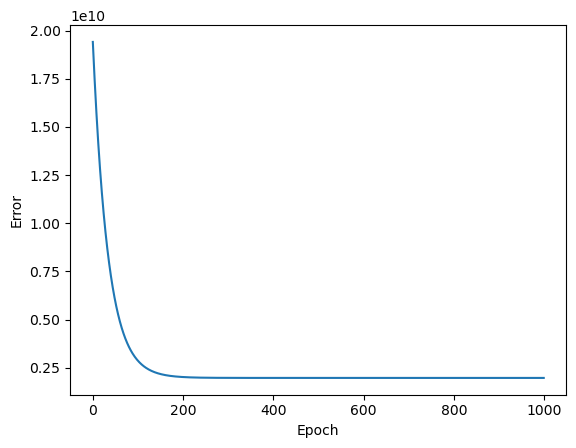

In [89]:
x_1FSF = data_entrenamiento['1stFlrSF']
y = data_entrenamiento['SalePrice']

epochs = 1000
imprimir_error_cada = 10
alpha = 0.00000001

models, error_list = train_linear_regression(x_1FSF, y, epochs, imprimir_error_cada, alpha)

plt.plot(error_list)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()


In [82]:
def evolucion_modelo(models, x, y, n):
    plots_numeros = len(models) // n
    fig, axs = plt.subplots(plots_numeros, figsize=(10, plots_numeros*5))
    
    for i in range(plots_numeros):
        iteration = (i + 1) * n
        beta = models[iteration - 1]
        y_pred = beta[0] * x + beta[1]
        
        axs[i].scatter(x, y, color='blue')
        axs[i].plot(x, y_pred, color='red')
        axs[i].set_title(f'Iteracion {iteration} - Modelo')
    
    plt.tight_layout()
    plt.show()


Iteración: 10 | Error: 19409709058.733456
Iteración: 20 | Error: 19409694620.424126
Iteración: 30 | Error: 19409680182.12637
Iteración: 40 | Error: 19409665743.840183
Iteración: 50 | Error: 19409651305.56557
Iteración: 60 | Error: 19409636867.302525
Iteración: 70 | Error: 19409622429.051056
Iteración: 80 | Error: 19409607990.81115
Iteración: 90 | Error: 19409593552.58282
Iteración: 100 | Error: 19409579114.366062


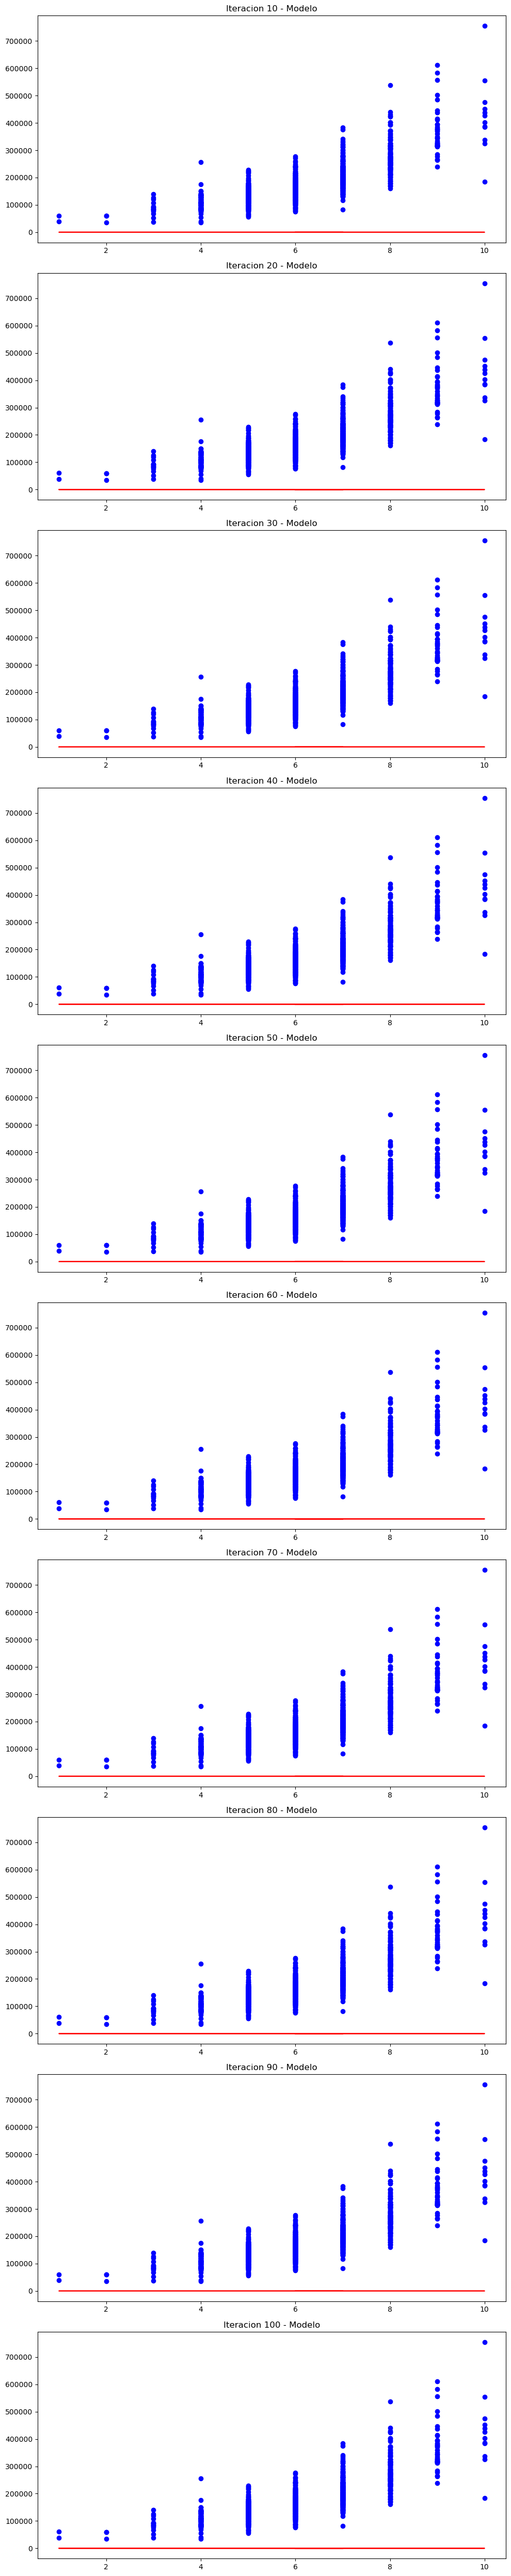

In [90]:
x = data_entrenamiento['OverallQual'].values
y = data_entrenamiento['SalePrice'].values
models, _ = train_linear_regression(x, y, 100, 10, 0.000000001)

evolucion_modelo(models, x, y, 10)


Iteración: 10 | Error: 18951893629.762928
Iteración: 20 | Error: 18457276337.200302
Iteración: 30 | Error: 17977063727.817863
Iteración: 40 | Error: 17510836295.664898
Iteración: 50 | Error: 17058186752.014801
Iteración: 60 | Error: 16618719669.564262
Iteración: 70 | Error: 16192051136.99436
Iteración: 80 | Error: 15777808423.591877
Iteración: 90 | Error: 15375629653.637781
Iteración: 100 | Error: 14985163490.278475
Iteración: 110 | Error: 14606068828.603598
Iteración: 120 | Error: 14238014497.662327
Iteración: 130 | Error: 13880678971.157778
Iteración: 140 | Error: 13533750086.566872
Iteración: 150 | Error: 13196924772.4402
Iteración: 160 | Error: 12869908783.643717
Iteración: 170 | Error: 12552416444.310968
Iteración: 180 | Error: 12244170398.281279
Iteración: 190 | Error: 11944901366.80592
Iteración: 200 | Error: 11654347913.310541
Iteración: 210 | Error: 11372256215.00843
Iteración: 220 | Error: 11098379841.165035
Iteración: 230 | Error: 10832479537.820076
Iteración: 240 | Error: 1

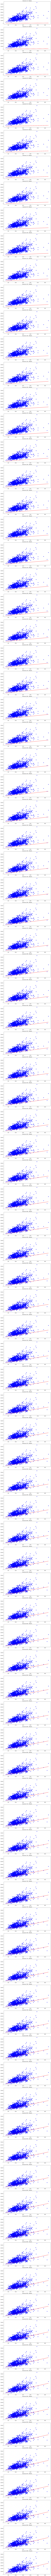

In [92]:
x = data_entrenamiento['1stFlrSF'].values
y = data_entrenamiento['SalePrice'].values
models, _ = train_linear_regression(x, y, 1000, 10, 0.000000001)

evolucion_modelo(models, x, y, 100)
